# Synth. Obs.: 1D AMRVAC

We create synthetic observations for the Magritte model of the 1D AMRVAC snapshot that was created in the [this example](../1_post-processing/0_create_AMRVAC_1D.ipynb).

## Setup

Import the required functionalty.

In [1]:
import magritte.core     as magritte             # Core functionality
import magritte.plot     as plot                 # Plotting
import magritte.tools    as tools                # Some tools
import numpy             as np                   # Data structures
import matplotlib.pyplot as plt                  # Plotting

from tqdm                 import tqdm            # Progress bars
from astropy              import constants       # Unit conversions
from palettable.cubehelix import cubehelix2_16   # Nice colorscheme
from ipywidgets           import interact        # Interactive plots

Define a working directory (you will have to change this). We assume here that the scripts of the [this example](../1_post-processing/1_create_AMRVAC_3D.ipynb) have already been executed and go back to that working directory.

In [2]:
wdir = "/home/frederik/Magritte-examples/AMRVAC_1D/"

Define file names.

In [3]:
model_file = f'{wdir}model_AMRVAC_1D.hdf5'   # Magritte model

Load the Magritte model.

In [4]:
model = magritte.Model(model_file)

## Model the medium

Initialize the model by setting up a spectral discretisation, computing the inverse line widths and initializing the level populations with their LTE values.

In [5]:
model.compute_spectral_discretisation ()
model.compute_inverse_line_widths     ()
model.compute_LTE_level_populations   ()

0

Iterate level populations until statistical equilibrium.

In [6]:
# model.compute_level_populations (False, 100)

In [7]:
npoints = model.parameters.npoints()                          # Number of points
nfreqs  = model.parameters.nfreqs()                           # Number of frequency bins
nlev    = model.lines.lineProducingSpecies[0].linedata.nlev   # Number of levels
nrays   = model.parameters.nrays()                            # Number of rays
hnrays  = model.parameters.hnrays()                           # Half nrays

pnts    = model.geometry.points.position
abns    = model.chemistry.species.abundance
frqs    = model.radiation.frequencies.nu
pops    = model.lines.lineProducingSpecies[0].population.reshape((npoints,nlev))
JJss    = model.radiation.J
uuss    = model.radiation.u
fcen    = model.lines.lineProducingSpecies[0].linedata.frequency[0]

rs      = np.array(pnts)[:, 0]
ns      = np.array(abns)[:, 1]
vs      = np.array(frqs)
Js      = np.array(JJss)
us      = np.array(uuss)

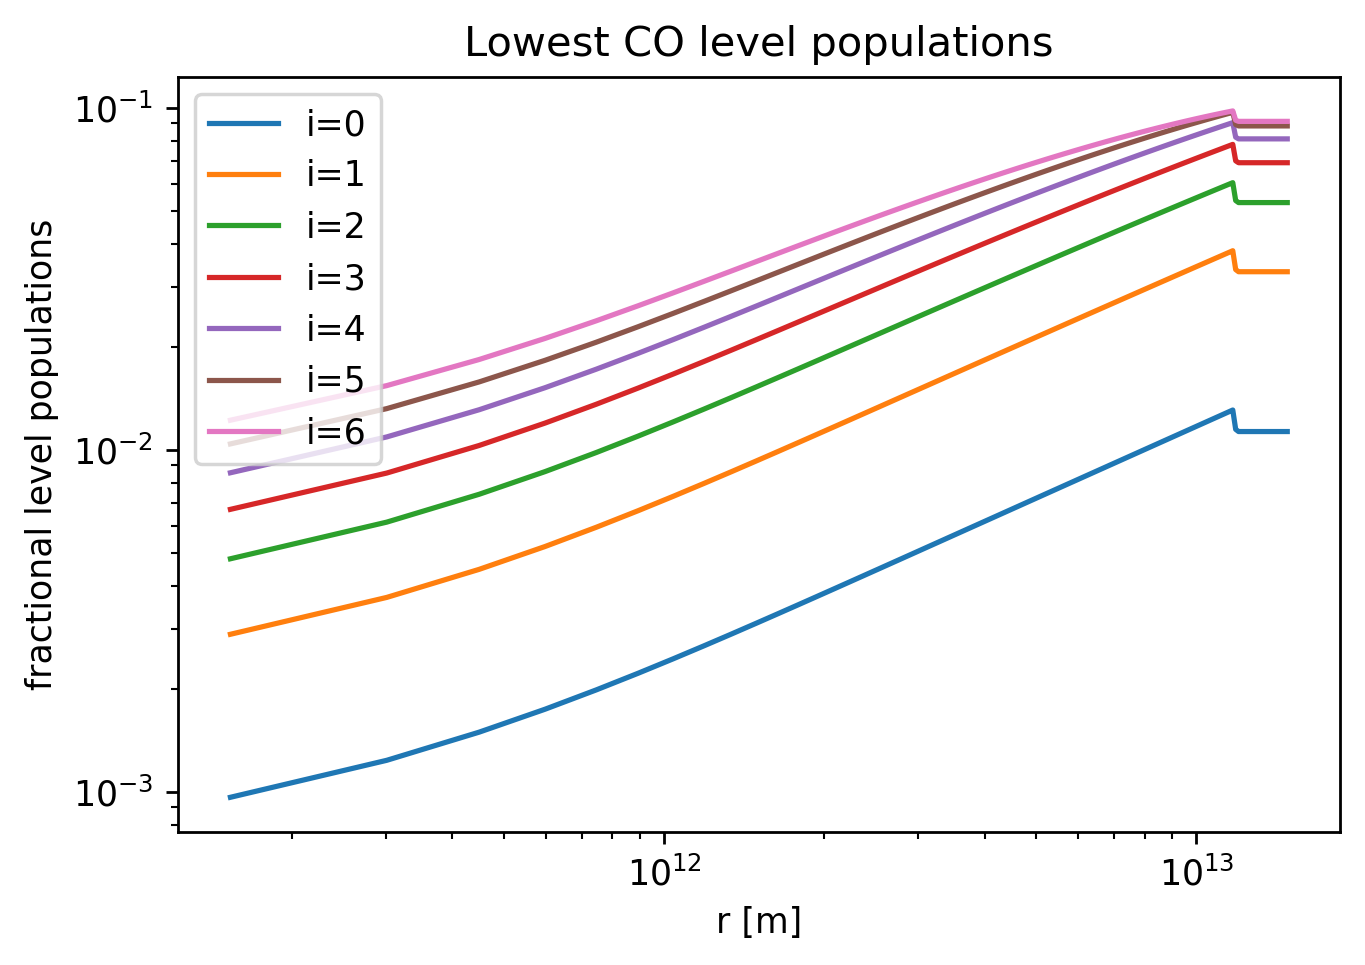

In [8]:
plt.figure(dpi=250)
plt.title('Lowest CO level populations')
for i in range(7):
    plt.plot(rs, pops[:,i]/ns, label=f'i={i}')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('fractional level populations')
plt.xlabel('r [m]')
plt.legend()

## Make synthetic observations

Now we can make synthetic observations of the model.

In [9]:
fcen = model.lines.lineProducingSpecies[0].linedata.frequency[0]
vpix = 25   # velocity pixel size [m/s] 
dd   = vpix * (model.parameters.nfreqs()-1)/2 / magritte.CC
fmin = fcen - fcen*dd
fmax = fcen + fcen*dd

model.compute_spectral_discretisation (fmin, fmax)
model.compute_image (model.parameters.hnrays()-1)

r = np.array(model.images[-1].ImX)
I = np.array(model.images[-1].I)
v = np.array(model.radiation.frequencies.nu)[0]

In [10]:
import ipywidgets as widgets
from astropy import units

In [12]:
def plot(p):
    plt.figure(dpi=150)
    plt.plot((v/fcen-1)*magritte.CC / 1000, I[p] - tools.I_CMB(v))
    plt.title(f'radius = {r[p]/(1.0*units.au).si.value:.0f} au')
    plt.xlabel('frequency [km/s]')
    plt.ylabel('intensity [W/m$^2$]')
widgets.interact(plot, p=(0, npoints-2))

interactive(children=(IntSlider(value=49, description='p', max=98), Output()), _dom_classes=('widget-interact'…

<function __main__.plot(p)>

(The plot is only interactive in a live notebook.)